In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.stats import pearsonr

**DATA PROCESSING**

In [ ]:
#Read CSV and take a first look
df = pd.read_csv('/PerformanceData.csv')
df.info()  #Information about the columns' names, datatypes and null values

In [ ]:
#Data Cleaning
for i in range(0,len(df)):
    df.Time[i] = df.Time[i].replace(":00 PM", "")
    df.Time[i] = df.Time[i].replace(":00 AM", "")
df['Time'] = pd.to_datetime(df['Time'])


****Problem:****
This performance test data is generated by performing a website performance test on a website about tourism( https://www.triip.me/). This website specializes in travel services such as accommodation, tickets, restaurants, transportation, activities. It contains 360 tests ranging.Below shows descriptive statistics, an overview of the some metrics.


1	Mdn DNS (ms)	std	70.513539
		min	108.500000
			
		max	531.500000
			
2	Mdn SSL (ms)	null	
			
		mean	593.206944
3	Avg Time To First Byte (ms)	std	286.766903
		min	209.750000
			
		max	1957.580000
			
		mean	9593.341667
4	Mdn Webpage Response (ms)	std	1461.569220
		min	7535.500000
			
		max	30094.000000
			
		mean	1255.504167
5	Mdn Render Start (ms)	std	192.891979
		min	807.000000
			
		max	2194.500000
			
		mean	731153.379056
6	Avg Image Bytes	std	61567.944565
		min	566819.580000
			
		max	908992.580000
			
		mean	573567.277056
7	Avg Script Bytes	std	19237.706558
		min	388817.400000
			
		max	610802.170000
			
 
		mean	10767.403389
8	Avg Css Bytes	std	25.517700
		min	10755.750000
			
		max	11081.250000
			
		mean	95.262775
9	% Availability	std	6.689858
		min	25.000000
			
		max	100.000000
			


*The time metric changes to a different format in the middle of the rows. There are two kinds of datetime format in the dataset. This might be the real problem of the website performance test system. 


In [ ]:
#Correlation Map
f,ax = plt.subplots(figsize=(18, 18)) # create common layouts of figires and subplots
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax) #Create a Seaborn Correlation Heatmap in Python
#pearson correlation test
pearsonr(df['% Availability'], df['Mdn Webpage Response (ms)'])
pearsonr(df['Avg Script Bytes'], df['Mdn Webpage Response (ms)'])

**Observation:**
The graph  gives an overview of the possible correlations of the metrics. Two pairs of them slightly more correlated, which are (Avg Script Bytes, % Availability) and (% Availability, Mdn Webpage Response (ms)). A Pearson correlation test suggests that the correlation of these two pairs of metrics are found to be significantly away from 0. A negative correlation means, when a variable increase, the other variable decrease, and a positive correlation is the opposite. 
-> It  might not suggest a causal relation. A detailed inspection needs to be performed by the web developers.

In [ ]:
#Scatter plots
df.plot(kind = "scatter",x='Avg Script Bytes',y = 'Mdn Webpage Response (ms)')


In [ ]:
#plot variables with datetime
df.plot(kind = 'line', x='Time', y='% Availability', grid = True,figsize=(20, 10), color = 'g')
plt.axhline(y = df['% Availability'].mean(), linewidth=2, color='r', ls = 'dashed')


In [ ]:
#Check outliers
x = df['% Availability'] < 70
df[x]

In [ ]:
#Map multiple outliers together
df.plot(kind = 'line', x='Time', 
        y=['Mdn DNS (ms)',
           'Avg Time To First Byte (ms)',
           'Mdn Render Start (ms)'], 
        label=['Mdn DNS (ms)',
               'Avg Time To First Byte (ms)', 
               'Mdn Render Start (ms)'],
                    
           grid = True,figsize=(20, 10))

In [ ]:
#Bar Chart

labels = ('Image', 'Script', 'Css')
y_pos = np.arange(len(labels))
sizes = [df['Avg Image Bytes'].mean()*0.001, 
         df['Avg Script Bytes'].mean()*0.001, 
         df['Avg Css Bytes'].mean()*0.001]
plt.barh(y_pos, sizes, align='center', alpha=0.5)
plt.yticks(y_pos, labels)
plt.xlabel('sizes kb')
plt.title('Avg Content Composition')

![](http:/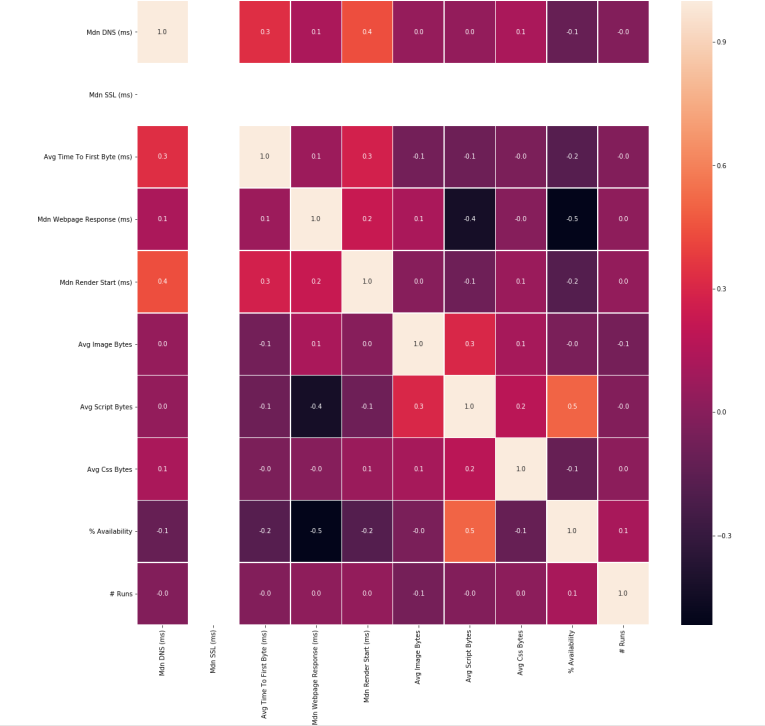/)

In [ ]:
#Pie Chart
plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

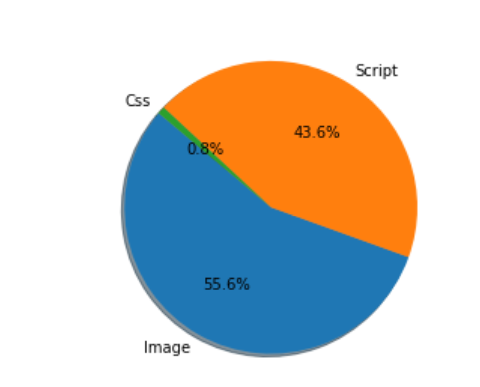](http://)

In [ ]:
#These tests don't need to run
#df.describe()
#type(df.Time[1])
#len(df)
#df.Time[1]
#print(':00 PM' in df.Time[i])
#print(df.Time[190].replace(":00 PM", ""))
#df.columns

In [ ]:
#(df['Avg Image Bytes'].mean()*0.001 + df['Avg Script Bytes'].mean()*0.001 + df['Avg Css Bytes'].mean()*0.001)*0.001


**Observation:**

The pie chart made from above codes helps to make Website Content Analysis and Website Ability Analysis

1. Website Content Analysis**

In this section the three metrics: Avg Image Bytes, Avg Script Bytes, and Avg Css Bytes are evaluated and analyzed together to provide more meaningful analysis. These three metrics can provide information about the main components of a website. Knowing the composition of the website might give web developer insights to improve the website in terms of speed or other performance indexes.

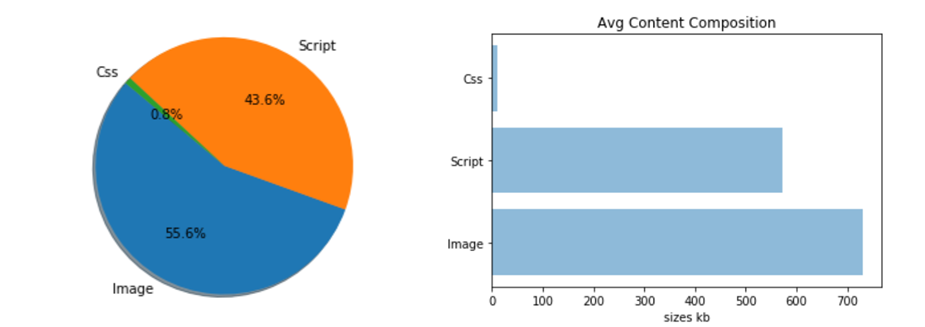](http://)

   **Avg Content Size by Content Type**

The two charts above shows the composition of the website, triip.me. The average size (KB) of image, script, and css are 731.153 KB, 573.57 KB, 10.77 KB respectively. The contents in total have an average size of 1.3155 MB. In comparison to the German trivago website, which only has 788.1 KB, the size of triip website is relatively higher and almost twice the size of trivago.de. In terms of the content composition of the website content, images have the most shares of the website size (more than half). Reducing the images displayed might be another direction for improvement.

 2. Website Ability

The availability of the website is also a significant metric to check because the users might stop browsing the website if the website is not available. With an average of 95.26% (shown red dashed line), the availability of the website seems to be acceptable. However, there are two significant time points when the website availability is below 70%, which are 06:00:00 and 12:00:00. Suprisely, these two time points are correspondent to those when Webpage Response times are unusually higher. As one can see from the two line charts below.
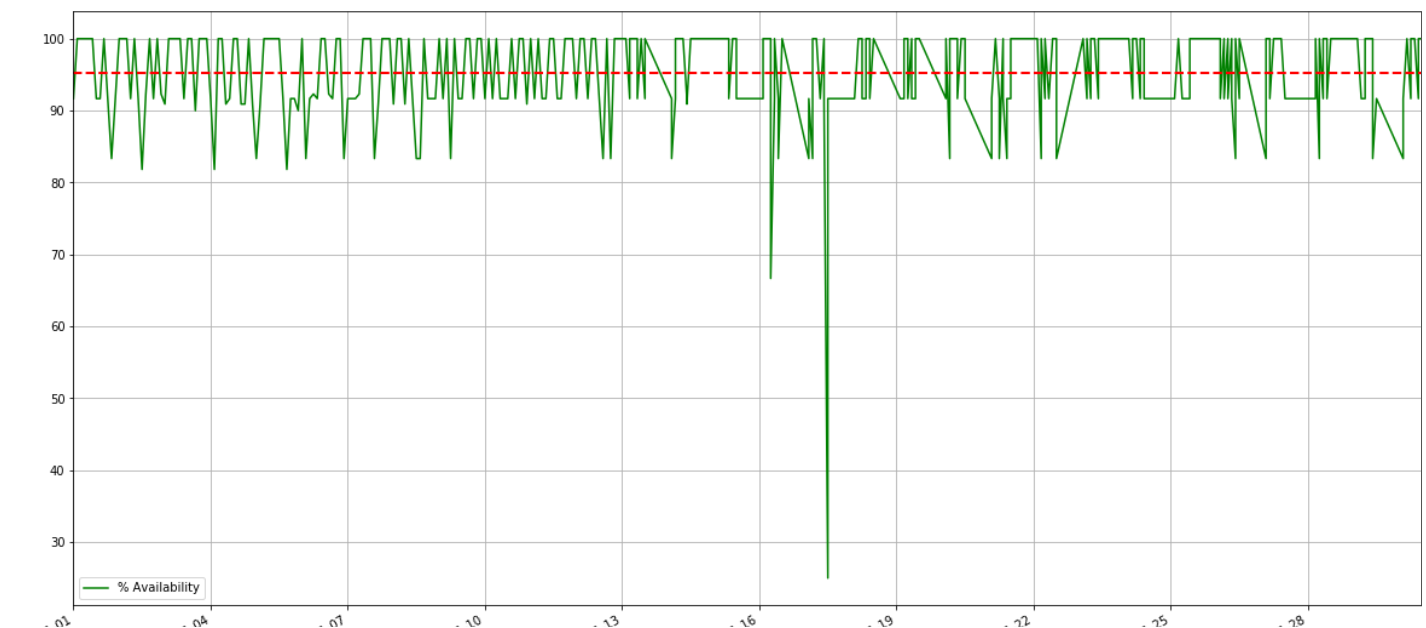](http://)






**Conclusion**

1. What I done to achive:
I get the overview of using Python to perform descriptive statistics to find out possible problems. Some visualisation and some analysis/ explaination are made.

2. What I have not yet done:
The possible data-driven suggestion for the website optimization are not yet done. Visualisation are not showed and run in this  platform using Matplotlib as planned. I did take screenshot of visualisations and attached to the notebook. The Statistics could need to be validated and more accuarate.

3. What I should do to improve:

- Data-driven website optimization: Learn more knowledge about SEO for website marketing
- Visualisation: Learn more about how to use Matplotlib in Jupyter Notebook/ Kaggle
- Statistics: Learn more about descriptive statistic analysis including related visualisation

